In [19]:
import config
import os

os.environ['IEX_TOKEN'] = config.iex_api_key

In [25]:
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2017, 1, 1)
end = datetime(2019, 11, 21)

df = get_historical_data("TSLA", start, end, output_format='pandas')

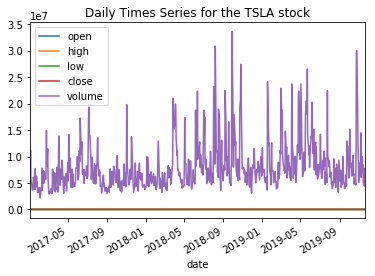

In [26]:
import matplotlib.pyplot as plt

df.plot()
plt.title('Daily Times Series for the TSLA stock')
plt.show()

In [37]:
from iexfinance.stocks import Stock

aapl = Stock("tsla")
aapl.get_book()

{'quote': {'symbol': 'TSLA',
  'companyName': 'Tesla, Inc.',
  'primaryExchange': 'NASDAQ',
  'calculationPrice': 'close',
  'open': None,
  'openTime': None,
  'close': None,
  'closeTime': None,
  'high': None,
  'low': None,
  'latestPrice': 352.22,
  'latestSource': 'Close',
  'latestTime': 'November 20, 2019',
  'latestUpdate': 1574283600198,
  'latestVolume': None,
  'iexRealtimePrice': None,
  'iexRealtimeSize': None,
  'iexLastUpdated': None,
  'delayedPrice': None,
  'delayedPriceTime': None,
  'extendedPrice': None,
  'extendedChange': None,
  'extendedChangePercent': None,
  'extendedPriceTime': None,
  'previousClose': 359.52,
  'previousVolume': 7736078,
  'change': -7.3,
  'changePercent': -0.0203,
  'volume': None,
  'iexMarketPercent': None,
  'iexVolume': None,
  'avgTotalVolume': 9412119,
  'iexBidPrice': None,
  'iexBidSize': None,
  'iexAskPrice': None,
  'iexAskSize': None,
  'marketCap': 63485893900,
  'peRatio': -73.99,
  'week52High': 379.49,
  'week52Low': 176.

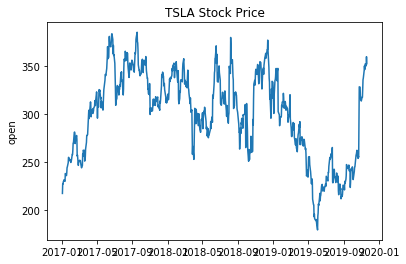

In [40]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(df.index, df['close'])
plt.title('TSLA Stock Price')
plt.ylabel('open');
plt.show()